<a href="https://colab.research.google.com/github/Dineshkumar-Anbalagan/Udacity-Predictive-Analytics-Nanodegree-Projects-Python/blob/main/Project_1(2)_Udacity_Predictive_Analytics_Nanodegree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Overview**
A jewelry company wants to put in a bid to purchase a large set of diamonds, but is unsure how much it should bid. In this project, you will use the results from a predictive model to make a recommendation on how much the jewelry company should bid for the diamonds.

### **US Number System**
All numbers that will be presented in this Nanodegree program will be based on the US numbering system where 5,269 is "five thousand two hundred sixty nine" and 158.1 is "one hundred fifty eight point one" where 1 is a decimal number. This is very important so please take note of this.

## **Project Details**
A diamond distributor has recently decided to exit the market and has put up a set of 3,000 diamonds up for auction. Seeing this as a great opportunity to expand its inventory, a jewelry company has shown interest in making a bid. To decide how much to bid, the company’s analytics team used a large database of diamond prices to build a linear regression model to predict the price of a diamond based on its attributes. You, as the business analysts, are tasked to apply that model to make a recommendation for how much the company should bid for the entire set of 3,000 diamonds.

The following diagram represents the analysis at a high level. Since the model is already built, your analysis will focus on the right side of the diagram.

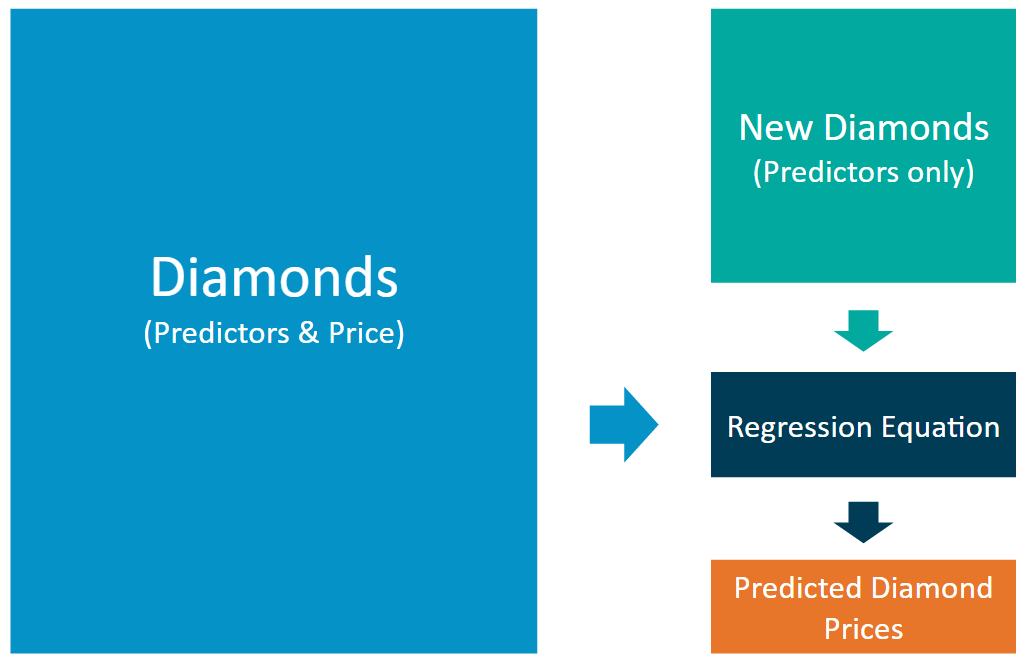

The linear regression model provides an equation that you can use to predict diamond prices for the set of 3,000 diamonds. The equation is below:

Price = -5,269 + 8,413 x Carat + 158.1 x Cut + 454 x Clarity

Step 1 – Understand the data: There are two datasets.

diamonds.csv contains the data used to build the regression model.
new_diamonds.csv contains the data for the diamonds the company would like to purchase.

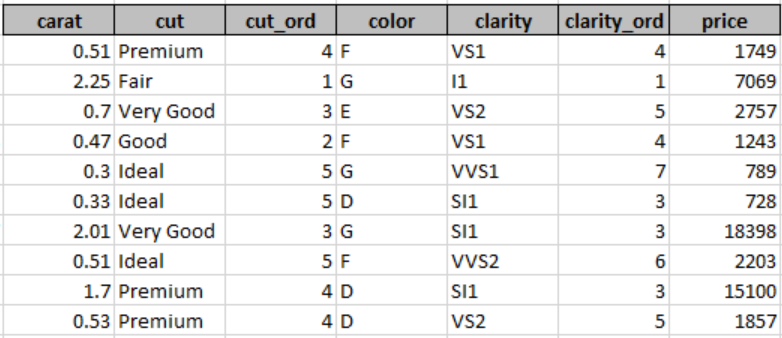

Both datasets contain carat, cut, and clarity data for each diamond. Only the diamonds.csv dataset has prices. You'll be predicting prices for the new_diamonds.csv dataset.

Carat represents the weight of the diamond, and is a numerical variable.
Cut represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. Each of these categories are represented by a number, 1-5, in the Cut_Ord variable.
Clarity represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS1, VS2, VVS2, VVS1, and IF. Each of these categories are represented by a number, 1-8, in the Clarity_Ord variable.
Note: Transforming category variables to ordinal variables like this is not always appropriate, but we’ve done it here for simplicity.
Step 2 – Calculate the predicted price for diamond: For each diamond, plug in the values for each of the variables into the linear model (equation). Then solve the equation to get the estimated, or predicted, diamond price. We suggest using a spreadsheet tool like Excel, Numbers, or Google Sheets. You could also do it in Alteryx and/or Tableau if you already have a license. If you don't have a license yet, you'll receive one after your free trial.

Step 3 – Make a recommendation: Now that you have the predicted price for each diamond, it’s time to calculate the bid price for the whole set. Note: The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of that price, so your recommended bid price should represent that.

Project Submission
To complete this project, you will be submitting a file in pdf format that contains the answers to the following questions across three steps.

Step 1 - Understanding the Model:

According to the linear model provided, if a diamond is 1 carat heavier than another with the same cut and clarity, how much more would the retail price of the heavier diamond be? Why?

If you were interested in a 1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), what retail price would the model predict for the diamond?

Step 2 - Visualize the Data: Create two scatter plots. If you're not sure what a scatter plot is, see here.

Plot 1 - Plot the data for the diamonds in the database, with carat on the x-axis and price on the y-axis.
Plot 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis.
Note: You can also plot both sets of data on the same chart in different colors.
What strikes you about this comparison? After seeing this plot, do you feel confident in the model’s ability to predict prices?
Step 3 - The Recommendation: What bid do you recommend for the jewelry company? Please explain how you arrived at that number.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
train = pd.read_csv("diamonds.csv")
test = pd.read_csv("new-diamonds.csv")

In [22]:
train.head(3)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757


In [23]:
test.head(3)

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5


In [24]:
train.drop_duplicates(inplace=True)

In [25]:
df_train = train.drop(['Unnamed: 0'], axis = 1)
df_test = test.drop(['Unnamed: 0'], axis = 1)

### **OWN METHOD**

In [26]:
X = train[['carat','cut_ord','clarity_ord']]
y = train['price']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
predicted_price_1 = regressor.predict(test[['carat','cut_ord','clarity_ord']])

1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), what retail price would the model predict for the diamond? ***(Own Method)***

In [29]:
regressor.predict([[1.5,3,5]]) #ANSWER

array([10060.04665317])

### **A FUNCTION BUILT FROM THE GIVEN FORMULA**

### ***Price = -5,269 + 8,413 x Carat + 158.1 x Cut + 454 x Clarity***

In [39]:
def Predict(Carat,Cut,Clarity):
  return (-5269+8413*Carat+158.1*Cut+454*Clarity)

In [42]:
predicted_price_2 = Predict(test['carat'], test['cut_ord'], test['clarity_ord'])

1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), what retail price would the model predict for the diamond? ***(Given Method)***

In [41]:
Predict(1.5,3,5) #Answer

10094.8

In [62]:
Predict(2.5,3,5) #Answer

18507.8

In [64]:
predicted_price_2.sum()

11733522.76

#### **PLOTTING (carat Vs price)**

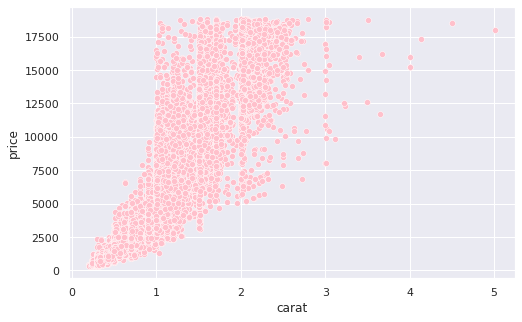

In [51]:
plt.figure(figsize=(8,5))
sns.set_theme()
sns.scatterplot(x = train['carat'], y = train['price'], color = 'pink')
plt.show()

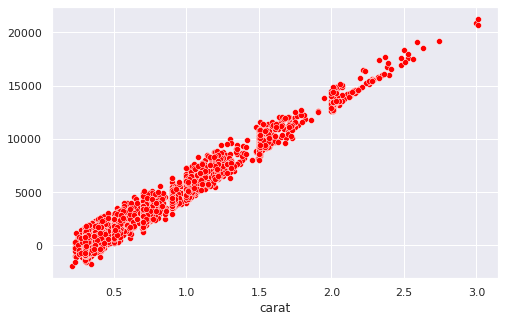

In [47]:

plt.figure(figsize=(8,5))
sns.set_theme()
sns.scatterplot(x = test['carat'], y = predicted_price_2, color = 'red')
plt.show()

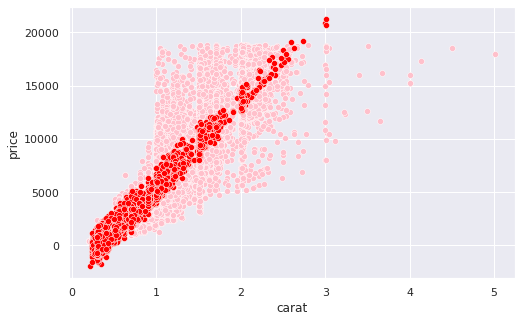

In [49]:
plt.figure(figsize=(8,5))
sns.set_theme()
sns.scatterplot(x = train['carat'], y = train['price'], color = 'pink')
sns.scatterplot(x = test['carat'], y = predicted_price_2, color = 'red')
plt.show()

In [59]:
def Find(carat):
  w = Predict(carat,3,5) #Answer
  z = Predict(carat+1,3,5) #Answer
  return "The answer is {}".format(z-w)

In [60]:
Find(1)

'The answer is 8413.0'

STEP 1 - Understanding the Model:
1. According to the linear formula provided, if a diamond is 1 carat heavier than another with the same cut and clarity, how much more would the retail price of the heavier diamond would be? Why?
2. If you were interested in a 1.5 carat diamond with a very good cut (represented by 3 in a model) and a VS2 clarity rating (represented by a 5 in the model), what retail price would the model predict for a diamond. 

#### **Answer:**
If a diamond is 1 carat heavier than another with the same cut and clarity, then the retail price of the heavier diamond would be increase in 8413.0 bucks. Because, based on the given data and the given linear formula, the coefficient of carat is 8413.0 .
For example,
Let's say, the price of a diamond of 1.5 carat with very good cut (3) and a VS2 clarity rating (5) is - 10094.8
While, the price of a diamond with the same cut and clarity but with additional one carat (1.5 +1) is - 18507.8 bucks
Price Difference = 18507.8 - 10094.8 = 8413.0 //
Hence, the retail price difference between two diamonds with same cut and clarity except the increase in one carat is - $8413.0.

STEP 2 - Visualize the Data:
•	Plot 1 - Plot the data for the diamonds in the database, with carat on the x-axis and price on the y-axis.
•	Plot 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis.
•	Note: You can also plot both sets of data on the same chart in different colors.
•	What strikes you about this comparison? After seeing this plot, do you feel confident in the model’s ability to predict prices?

#### **Answer:**
•	For using linear regression, the independent and dependent variable must be linearly correlated – either positively or negatively.
•	For training dataset, it is clear that the x and y axis are positively correlated from 0 to 1 very well, while it got distorted after 1 carat.
Furthermore, the predicted values and the carat values from the testing dataset are very well linearly correlated and directly proportional.  Judging from the above plot, linear regression is a good choice to build this mode model while it is not the best choice.







STEP 3 - The Recommendation: 
What bid do you recommend for the jewelry company? Please explain how you arrived at that number.

#### **Answer:**
RECOMMEDNADTION
From my analysis, the predicted sum of all 3000 diamonds together is $11733522.76. 

However, the above value of 11733522.76 is a customer selling price which is 30 percent higher than the company’s buying price. Hence the company should bid 70 % of the above mentioned price, which is $8213465.932. 

